<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Prob/blob/main/Aula_02_An%C3%A1lise_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Configurações

**Driver**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Instalações**

In [ ]:
# Exportando figuras com melhores resoluções

!pip install -U kaleido
!apt-get install poppler-utils

**Bibliotecas**

In [5]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
from plotly.offline import iplot

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pprint import pprint
import seaborn as sns

# sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# **Analisando os dados**

In [6]:
## Leitura de dados 

dfy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós/ML MP/Datasets/GradienteData.csv')
dfy.drop('Unnamed: 0',axis='columns', inplace=True)

In [7]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns',20)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pós/ML MP/Datasets/winequality-red.csv', delimiter=';')

## **Exploração dos dados**




In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [9]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.shape

(1599, 12)

In [12]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
sorted_df=df.sort_values(by='quality', ascending=False)
sorted_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.40,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
828,7.8,0.57,0.09,2.3,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
1449,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8


In [15]:
print(df[df['quality'] == 8].mean())

fixed acidity            8.566667
volatile acidity         0.423333
citric acid              0.391111
residual sugar           2.577778
chlorides                0.068444
free sulfur dioxide     13.277778
total sulfur dioxide    33.444444
density                  0.995212
pH                       3.267222
sulphates                0.767778
alcohol                 12.094444
quality                  8.000000
dtype: float64


In [16]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_pivot_table = df.pivot_table(colum_names,['quality'], aggfunc='median')

df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


In [17]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## **Visualização**


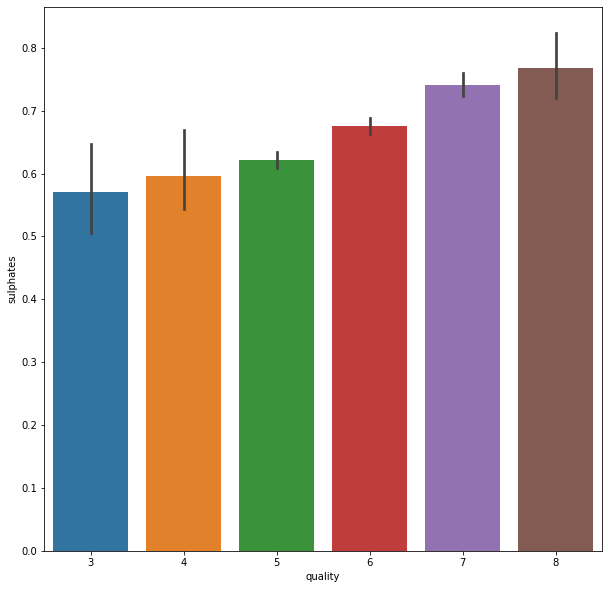

In [18]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x='quality', y='sulphates', data=df)
plt.show()

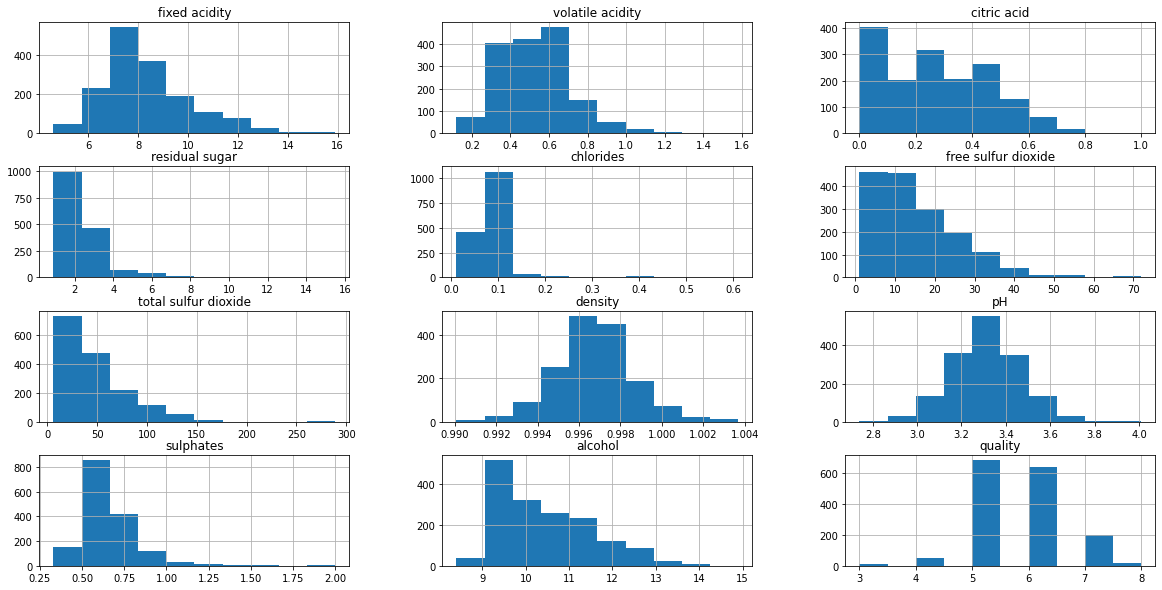

In [19]:
df.hist(bins=10,figsize=(20, 10))
plt.show()

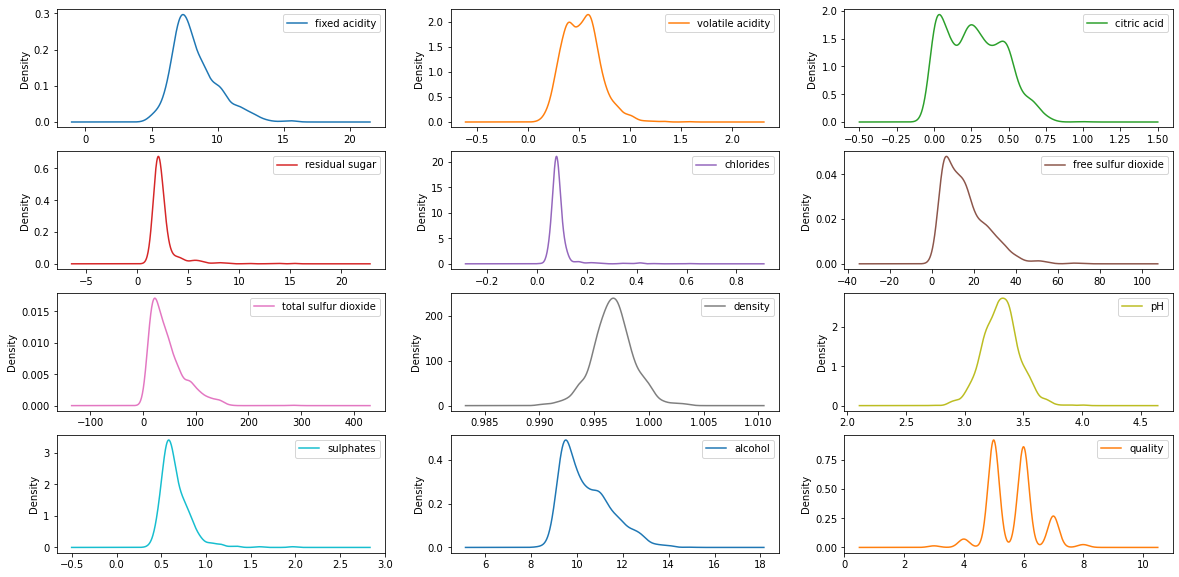

In [20]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False,figsize=(20, 10))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



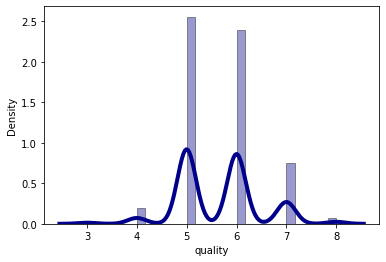

In [21]:
sns.distplot(df['quality'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [22]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

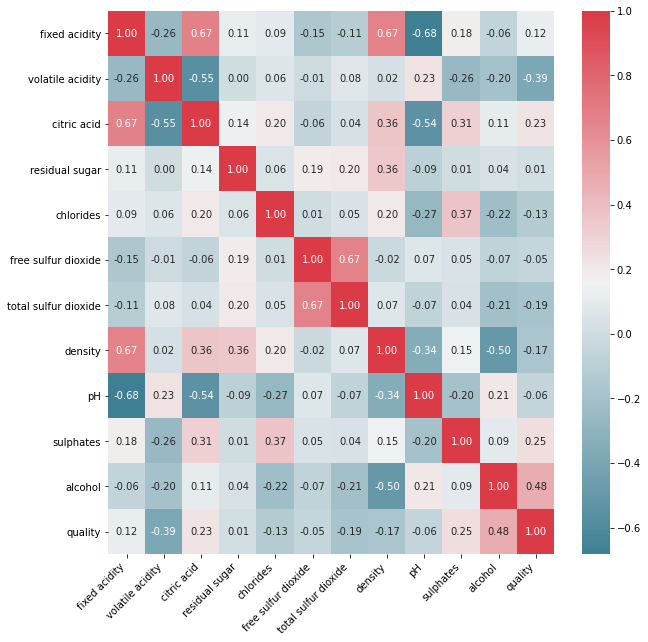

In [23]:
correlations = df.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.savefig('images/correlacao.eps', format='eps')
plt.show()

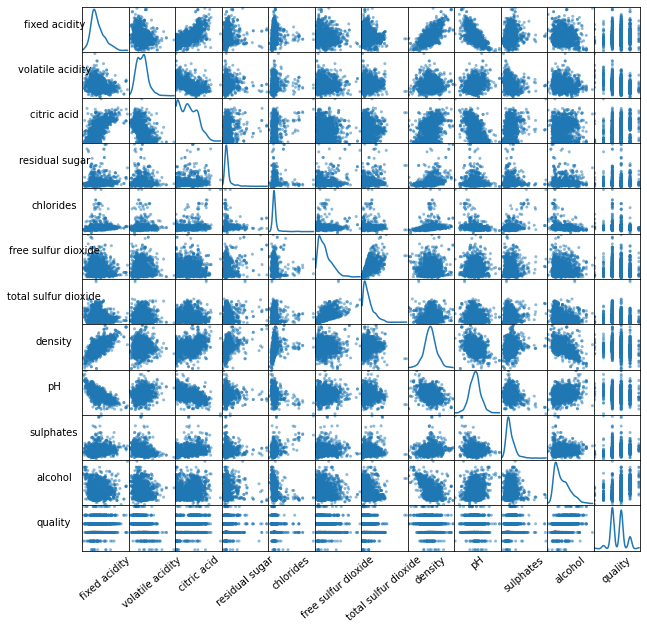

In [24]:
sm = scatter_matrix(df, figsize=(10, 10), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

# **Regressão**

In [25]:
y = np.array(df['density'])
x = np.array(df['fixed acidity'])

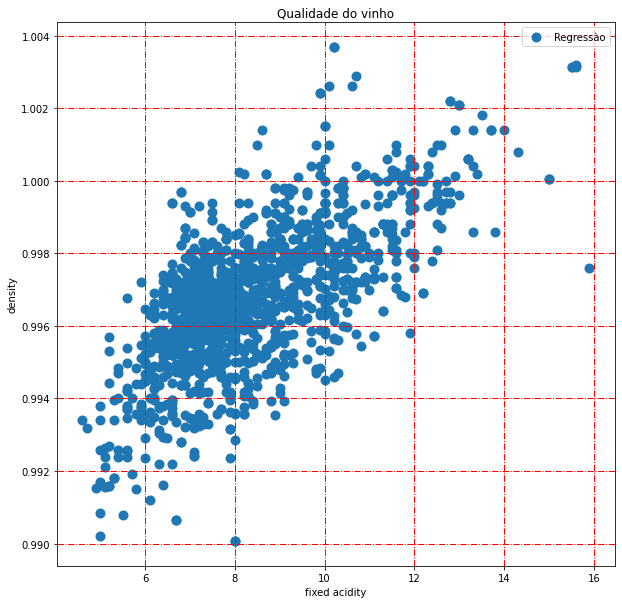

In [26]:
# Visualização 

fig= plt.figure(figsize=(10,10))

plt.scatter(x,y,label="Regressào",linewidth = 4)     # em investigação
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Qualidade do vinho")
plt.ylabel("density")
plt.xlabel("fixed acidity")
plt.legend(loc='upper right')

plt.show()

## **Método ordinário**

Algoritmo para determinação da regressão entre duas variáveis:

\begin{equation}
    \theta_1 = \frac{\overline{x_n \; y_n}-\overline{x_n}\;\overline{y_n}}{\overline{x_n^2}-\overline{x_n}^2}
\end{equation}

\begin{equation}
    \theta_0 = \overline{ y_n} -\theta_1 \overline{x_n}
\end{equation}


In [27]:
T1 = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
T0 = np.mean(y) - T1*np.mean(x)

print(T1,T0)

0.0007241577183646439 0.9907219496290327


## **Comparação**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


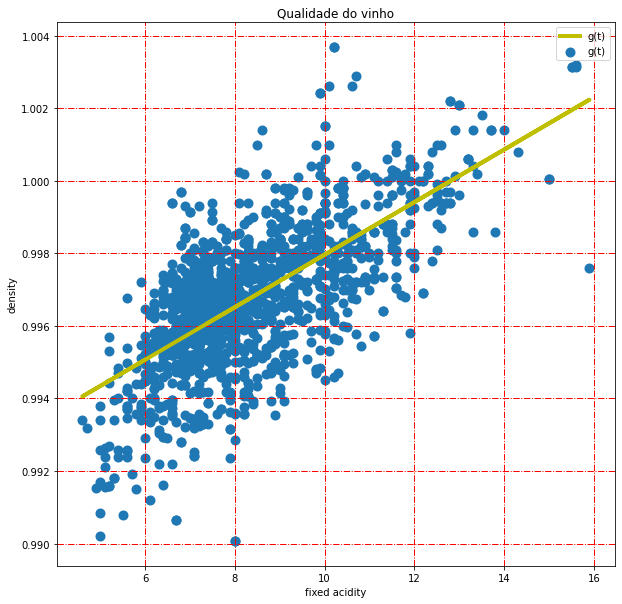

In [28]:
ym = T0 + T1*x                      # valores obtidos a partir do modelo

# Visualização dos sinais

fig= plt.figure(figsize=(10,10))

plt.scatter(x,y,label="g(t)",linewidth = 4)     # amostras
plt.plot(x,ym,label="g(t)",linewidth = 4,color='y')       # Valores preditos
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Qualidade do vinho")
plt.ylabel("density")
plt.xlabel("fixed acidity")
plt.legend(loc='upper right')

plt.savefig('images/regressao.eps', format='eps')

plt.show()

## **Avaliando o erro**

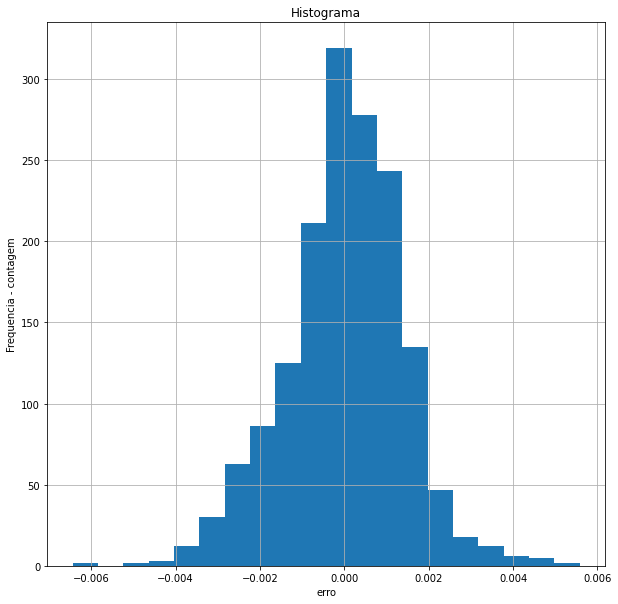

In [29]:
erro = y-ym
np.histogram(erro)
dfErro = pd.DataFrame(erro)

dfErro.hist(bins=20,figsize=(10, 10))

plt.title("Histograma")
plt.ylabel("Frequencia - contagem")
plt.xlabel("erro")

plt.savefig('images/erro.eps', format='eps')

plt.show()

In [30]:
dfErro = pd.DataFrame(erro, columns=['Data'])
dfErro.describe()

,Data
count,1.599000e+03
mean,5.068560e-18
std,1.404401e-03
min,-6.445211e-03
25%,-7.700429e-04
50%,7.377789e-05
75%,9.433836e-04
max,5.581642e-03


## **Ajustando a densidade de probabilidade ao erro**

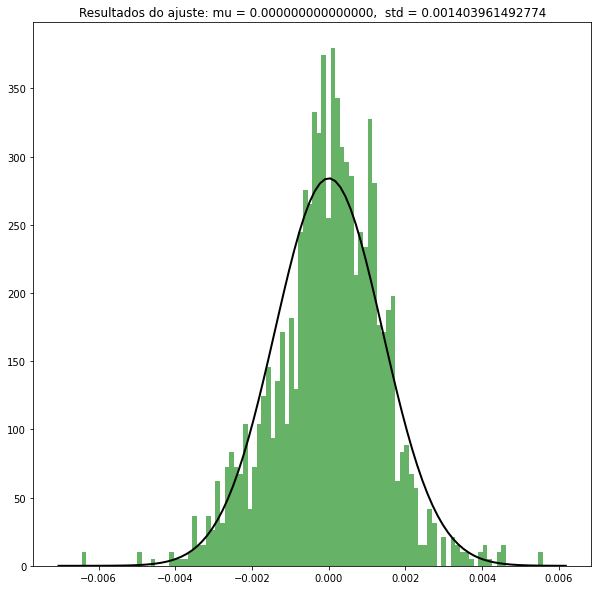

In [31]:
from scipy.stats import norm

# Ajustando uma distribuição normal
# média e desvio padrão

data = erro
mu, std = norm.fit(data)

## Visualização

fig= plt.figure(figsize=(10,10))
plt.hist(data, bins=100, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Resultados do ajuste: mu = %.15f,  std = %.15f" % (mu, std)
plt.title(title)

plt.show()

# **Referências**

https://scipy-lectures.org/advanced/mathematical_optimization/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.shgo.html

https://scipy.github.io/devdocs/tutorial/optimize.html

http://www.sfu.ca/~ssurjano/egg.html

https://archive.ics.uci.edu/ml/datasets/wine+quality.

https://medium.com/analytics-vidhya/step-by-step-guide-for-predicting-wine-quality-using-scikit-learn-de5869f8f91a

https://gist.github.com/NataliiaRastoropova?page=2

https://medium.com/analytics-vidhya/step-by-step-guide-for-predicting-wine-quality-using-scikit-learn-de5869f8f91a

https://brilliant.org/wiki/monty-hall-problem/#:~:text=The%20Monty%20Hall%20problem%20is,to%20choose%20between%20three%20doors.&text=You%20choose%20a%20door.


https://towardsdatascience.com/solving-the-monty-hall-problem-with-bayes-theorem-893289953e16